<a href="https://colab.research.google.com/github/Diggi14/project_Property2/blob/main/uni_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
!git clone https://github.com/Diggi14/project_Property2.git

fatal: destination path 'project_Property2' already exists and is not an empty directory.


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [66]:
df=pd.read_csv('/content/project_Property2/cleaned_data2.csv')

In [67]:
df.head(4)

,PREFERENCE,PROPERTY_TYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,FLOOR_NUM,TOTAL_FLOOR,SUPERBUILTUP_SQFT,PRICE,LOCALITY_WO_CITY,stories
0,S,Residential Apartment,4.0,4.0,4.0,8766.0,Semi-furnished,5-10,14.0,26.0,3434.0,2.63,Sector 84,single
1,S,Residential Apartment,4.0,4.0,3.0,21176.0,Semi-furnished,1-5,7.0,29.0,2870.0,3.60,Sector 81,single
2,S,Residential Apartment,3.0,3.0,3.0,13740.0,Semi-furnished,1-5,14.0,28.0,2802.0,3.85,Sector 112,single
3,S,Residential Apartment,3.0,4.0,4.0,8515.0,Semi-furnished,1-5,4.0,27.0,2290.0,1.95,Sector 104,single


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9395 entries, 0 to 9394
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PREFERENCE           9395 non-null   object 
 1   PROPERTY_TYPE        9395 non-null   object 
 2   BEDROOM_NUM          9395 non-null   float64
 3   BATHROOM_NUM         9395 non-null   float64
 4   BALCONY_NUM          9395 non-null   float64
 5   PRICE_PER_UNIT_AREA  9395 non-null   float64
 6   FURNISH              9395 non-null   object 
 7   AGE                  9395 non-null   object 
 8   FLOOR_NUM            9395 non-null   float64
 9   TOTAL_FLOOR          9395 non-null   float64
 10  SUPERBUILTUP_SQFT    9395 non-null   float64
 11  PRICE                9395 non-null   float64
 12  LOCALITY_WO_CITY     9395 non-null   object 
 13  stories              9395 non-null   object 
dtypes: float64(8), object(6)
memory usage: 1.0+ MB


In [69]:
df.duplicated().sum()

np.int64(53)

In [70]:
df.drop_duplicates(inplace=True)

In [71]:
df['PREFERENCE'].value_counts()

,count
PREFERENCE,
S,9261
R,81


In [72]:
df['PROPERTY_TYPE'].value_counts()

,count
PROPERTY_TYPE,
Residential Apartment,6293
Independent/Builder Floor,2656
Independent House/Villa,393


In [73]:
df['LOCALITY_WO_CITY'].value_counts().shape

(181,)

<Axes: xlabel='LOCALITY_WO_CITY'>

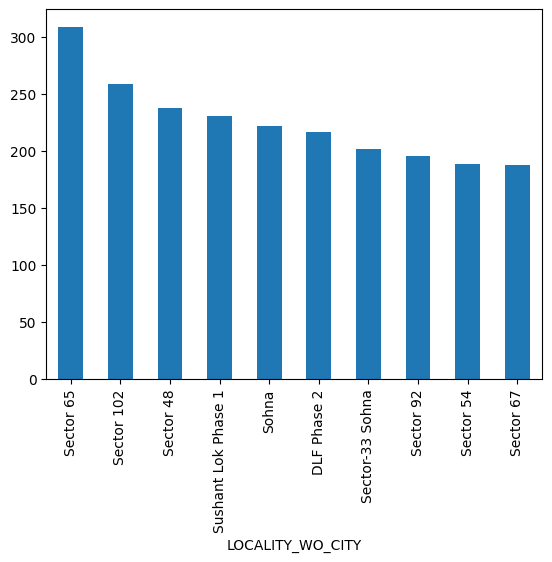

In [74]:
df['LOCALITY_WO_CITY'].value_counts().head(10).plot(kind='bar')

In [75]:
df['LOCALITY_WO_CITY'].value_counts(normalize=True).cumsum().head(20)

,proportion
LOCALITY_WO_CITY,
Sector 65,0.033076
Sector 102,0.060801
Sector 48,0.086277
Sushant Lok Phase 1,0.111004
Sohna,0.134768
DLF Phase 2,0.157996
Sector-33 Sohna,0.179619
Sector 92,0.200599
Sector 54,0.220831


<Axes: xlabel='LOCALITY_WO_CITY'>

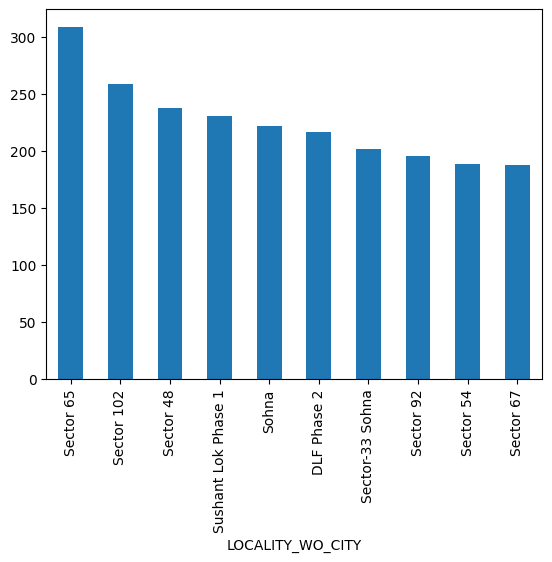

In [76]:
df['LOCALITY_WO_CITY'].value_counts().head(10).plot(kind='bar')

<Axes: >

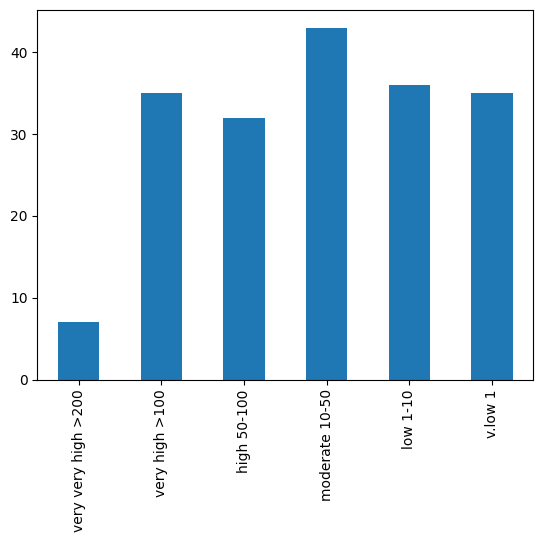

In [77]:
sector=df['LOCALITY_WO_CITY'].value_counts()

freq_bins={
    "very very high >200":(sector>=200).sum(),
    "very high >100":(sector>=100).sum(),
    "high 50-100":((sector<100) & (sector>=50)).sum(),
    "moderate 10-50":((sector<50) & (sector>=10)).sum(),
    "low 1-10":((sector<10) & (sector>1)).sum(),
    "v.low 1":(sector==1).sum(),
}
freq_series = pd.Series(freq_bins)
freq_series.plot(kind='bar')

<Axes: xlabel='PRICE', ylabel='Count'>

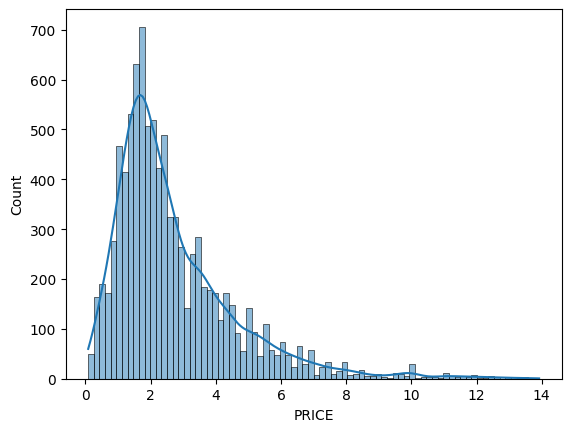

In [78]:
sns.histplot(df['PRICE'],bins=80,kde=True)

<Axes: xlabel='PRICE', ylabel='Count'>

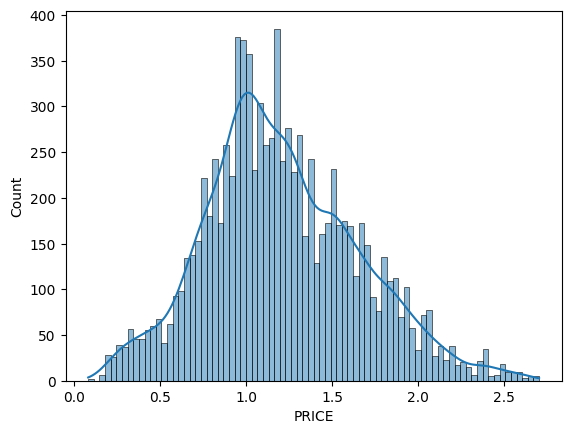

In [79]:
sns.histplot(np.log1p(df['PRICE']),bins=80,kde=True)

<Axes: xlabel='PRICE'>

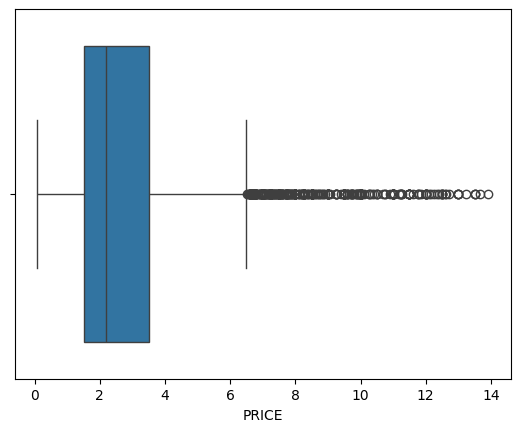

In [80]:
sns.boxplot(x=df['PRICE'])

In [81]:
df['PRICE'].skew()

np.float64(1.82252287439133)

In [82]:
df['PRICE'].kurt()

np.float64(4.624151153993674)

In [83]:
df['PRICE'].quantile([0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,PRICE
0.01,0.316025
0.05,0.660000
0.25,1.500000
0.50,2.200000
0.75,3.500000
0.95,6.449500
0.99,9.999873


<Axes: >

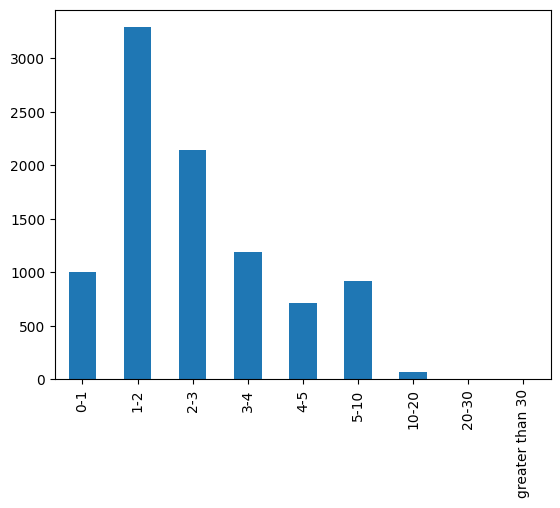

In [84]:
price=df['PRICE']

freq_bins={
    "0-1":((price>0)&(price<=1)).sum(),
    "1-2":((price>1)&(price<=2)).sum(),
    "2-3":((price>2)&(price<=3)).sum(),
    "3-4":((price>3)&(price<=4)).sum(),
    "4-5":((price>4)&(price<=5)).sum(),
    "5-10":((price>5)&(price<=10)).sum(),
    "10-20":((price>10)&(price<=20)).sum(),
    "20-30":((price>20)&(price<=30)).sum(),
    "greater than 30":(price>30).sum()}
freq_series = pd.Series(freq_bins)
freq_series.plot(kind='bar')

In [85]:
Q1=df['PRICE_PER_UNIT_AREA'].quantile(0.25)
Q3=df['PRICE_PER_UNIT_AREA'].quantile(0.75)
IQR=Q3-Q1

In [86]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound,upper_bound)

-566.0 23610.0


In [87]:
outliers=df[(df['PRICE_PER_UNIT_AREA']>upper_bound)]
outliers.shape


(370, 14)

<Axes: xlabel='PRICE_PER_UNIT_AREA'>

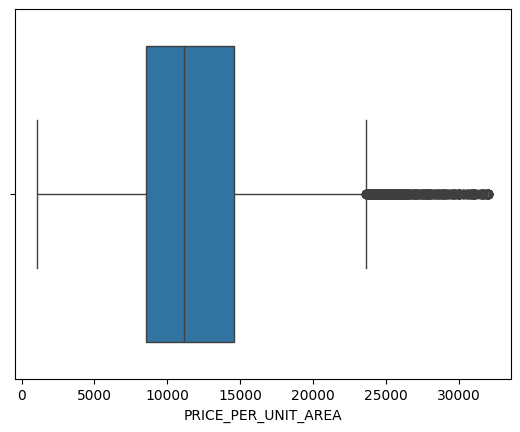

In [88]:
sns.boxplot(x=df['PRICE_PER_UNIT_AREA'])

<Axes: xlabel='PRICE_PER_UNIT_AREA', ylabel='Count'>

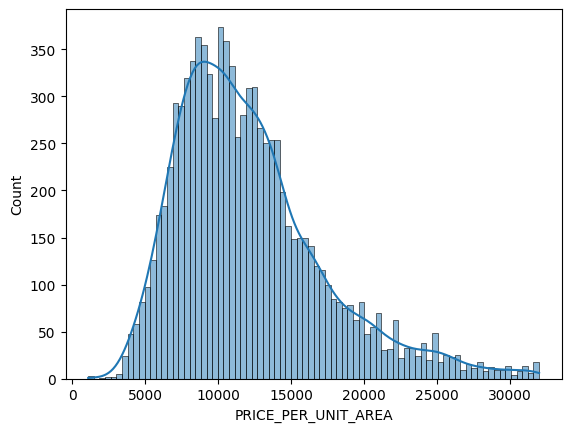

In [89]:
sns.histplot(df['PRICE_PER_UNIT_AREA'],bins=80,kde=True)

In [90]:
df['PRICE_PER_UNIT_AREA'].skew()

np.float64(1.1063596721626903)

<Axes: xlabel='PRICE_PER_UNIT_AREA', ylabel='Count'>

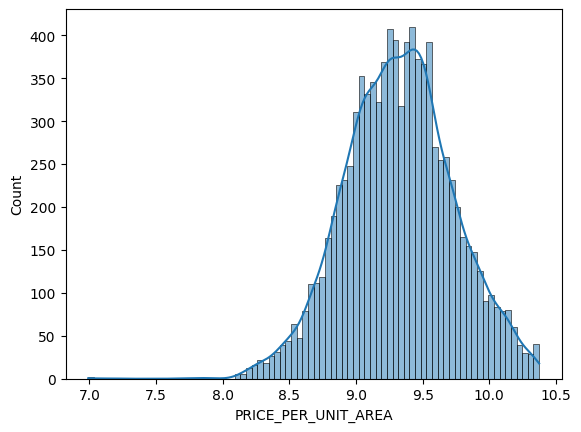

In [91]:
sns.histplot(np.log1p(df['PRICE_PER_UNIT_AREA']),bins=80,kde=True)

In [92]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

<Axes: ylabel='Count'>

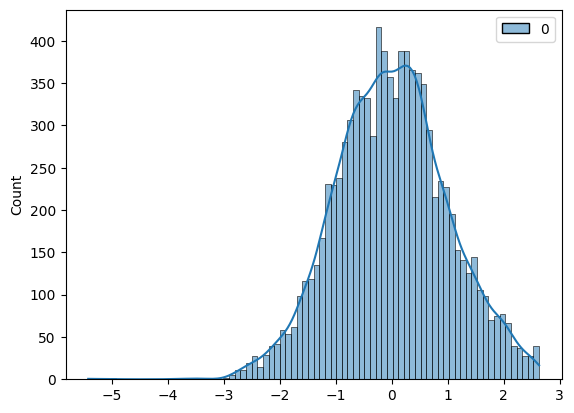

In [93]:
sns.histplot(pt.fit_transform(df[['PRICE_PER_UNIT_AREA']]),bins=80,kde=True)

<Axes: xlabel='PRICE_PER_UNIT_AREA', ylabel='Count'>

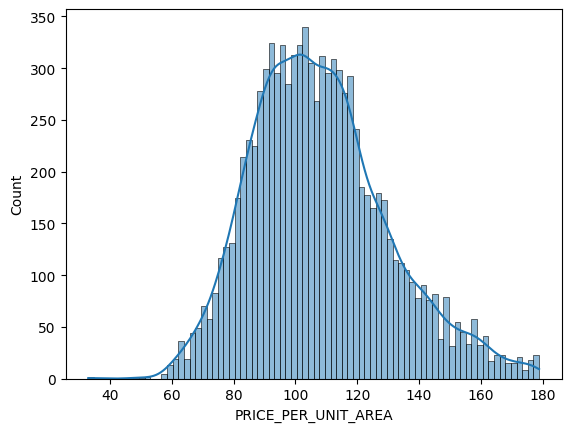

In [94]:
sns.histplot(np.sqrt(df['PRICE_PER_UNIT_AREA']),bins=80,kde=True)

srt the price per sq and log the price

<Axes: xlabel='BEDROOM_NUM'>

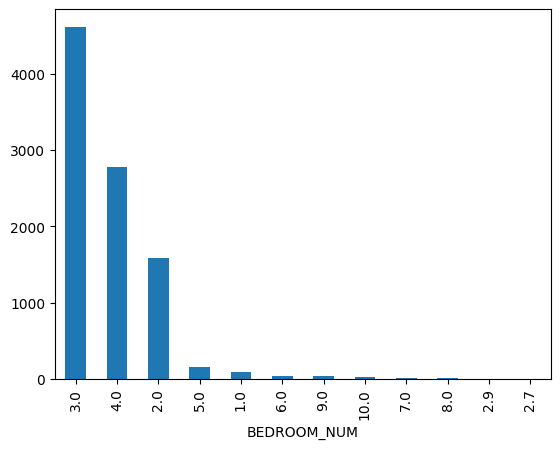

In [95]:
df['BEDROOM_NUM'].value_counts().plot(kind='bar')

In [96]:
df[(df['BEDROOM_NUM']*10)%10 !=0]

,PREFERENCE,PROPERTY_TYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,FLOOR_NUM,TOTAL_FLOOR,SUPERBUILTUP_SQFT,PRICE,LOCALITY_WO_CITY,stories
4053,S,Residential Apartment,2.9,2.0,2.8,9750.0,Semi-furnished,1-5,11.0,21.0,1641.0,1.6,Sector 70A,single
7184,S,Residential Apartment,2.7,3.0,3.2,8350.0,Semi-furnished,1-5,6.0,11.0,1437.0,1.2,Sector 70,single


In [97]:
df.loc[[4053,7184],'BEDROOM_NUM']=np.round(df.loc[[4053,7184],'BEDROOM_NUM'])

<Axes: xlabel='BEDROOM_NUM'>

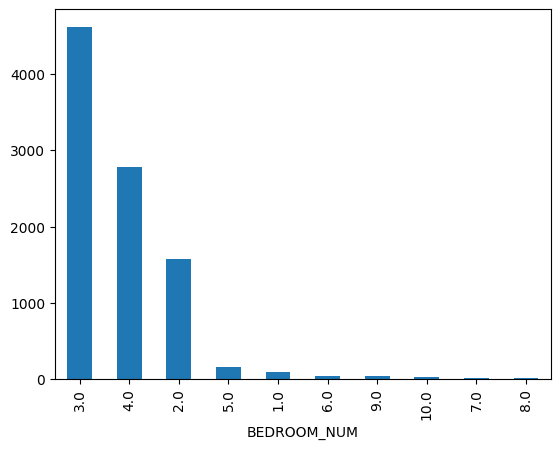

In [98]:
df['BEDROOM_NUM'].value_counts().plot(kind='bar')

correct bedroom and balcony

<Axes: xlabel='BATHROOM_NUM'>

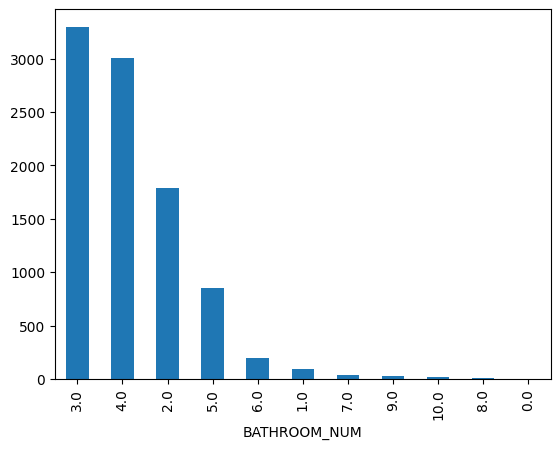

In [99]:
df['BATHROOM_NUM'].value_counts().plot(kind='bar')

In [100]:
df[df['BATHROOM_NUM']==0] #drop such rows

,PREFERENCE,PROPERTY_TYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,FLOOR_NUM,TOTAL_FLOOR,SUPERBUILTUP_SQFT,PRICE,LOCALITY_WO_CITY,stories
705,S,Residential Apartment,4.0,0.0,3.1,31021.0,Semi-furnished,Under Construction,1.0,4.0,1888.5,5.860,Sector 63A,single
706,S,Residential Apartment,3.0,0.0,3.0,31021.0,Semi-furnished,Under Construction,1.0,4.0,1298.5,4.030,Sector 63A,single
1033,S,Residential Apartment,3.0,0.0,2.6,10897.0,Semi-furnished,Under Construction,1.0,4.0,1534.0,1.670,Sector 79,single
1034,S,Residential Apartment,2.0,0.0,3.4,10897.0,Semi-furnished,Under Construction,1.0,4.0,1196.5,1.305,Sector 79,single


In [101]:
ind=df[df['BATHROOM_NUM']==0].index
df.drop(ind,inplace=True)

In [102]:
df[df['BATHROOM_NUM']>df['BEDROOM_NUM']*1.8]
#drop 1903,2092.3845,5835,6975

,PREFERENCE,PROPERTY_TYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,FLOOR_NUM,TOTAL_FLOOR,SUPERBUILTUP_SQFT,PRICE,LOCALITY_WO_CITY,stories
1523,S,Residential Apartment,1.0,2.0,1.0,6767.000000,Unfurnished,1-5,6.0,14.0,362.0,0.245,Sector 102,single
1903,S,Residential Apartment,3.0,6.0,4.0,19765.000000,Semi-furnished,0-1,9.0,30.0,2985.0,5.900,Sector 59,single
2092,S,Residential Apartment,3.0,6.0,4.0,18512.000000,Semi-furnished,Under Construction,24.0,30.0,3025.0,5.600,Sector 59,single
2336,S,Independent House/Villa,1.0,2.0,2.0,14444.444444,Unfurnished,10+,1.0,1.0,900.0,1.300,Sector 7 Extension,single
3022,S,Residential Apartment,1.0,2.0,1.0,7142.000000,Unfurnished,1-5,7.0,14.0,350.0,0.250,Sector 102,single
3035,S,Residential Apartment,1.0,2.0,1.0,7172.000000,Semi-furnished,0-1,1.0,12.0,488.0,0.350,Sohna,single
3845,S,Residential Apartment,2.0,4.0,4.0,11921.000000,Semi-furnished,0-1,4.0,28.0,2441.0,2.910,Sector 112,single
4144,S,Residential Apartment,1.0,2.0,3.0,7500.000000,Unfurnished,1-5,0.0,12.0,1122.0,0.790,Sector 88A,single
5835,S,Residential Apartment,3.0,6.0,4.0,15202.000000,Semi-furnished,5-10,12.0,19.0,2368.0,3.600,Sector 30,single
5927,S,Residential Apartment,1.0,2.0,2.0,6651.000000,Semi-furnished,Under Construction,8.0,24.0,482.0,0.250,Sector 89,single


In [103]:
df.drop([1903,2092,3845,5835,6975],inplace=True)

<Axes: xlabel='FLOOR_NUM', ylabel='Count'>

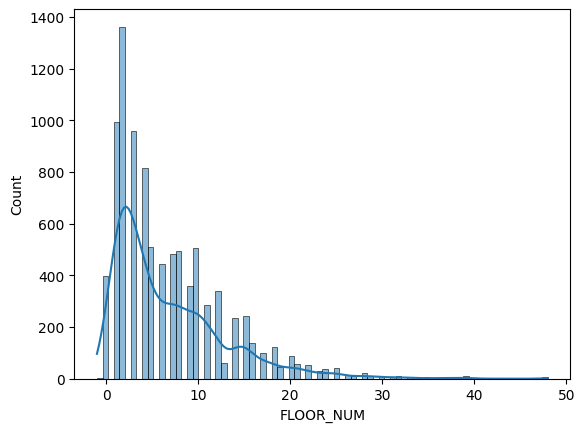

In [104]:
sns.histplot(df["FLOOR_NUM"],bins=80,kde=True)

In [105]:
df["FLOOR_NUM"].skew()

np.float64(1.660648016129824)

<Axes: xlabel='SUPERBUILTUP_SQFT', ylabel='Count'>

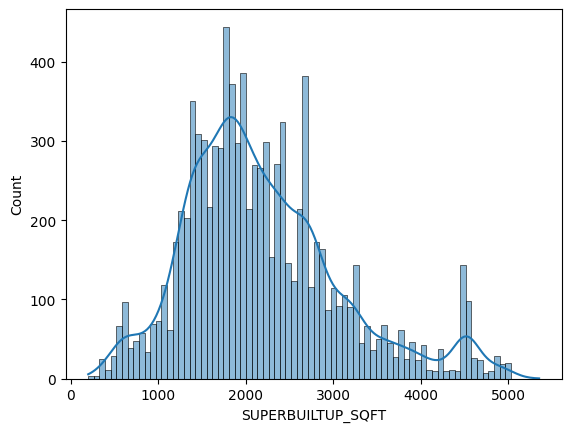

In [106]:
sns.histplot(df['SUPERBUILTUP_SQFT'],bins=80,kde=True)

<Axes: xlabel='stories'>

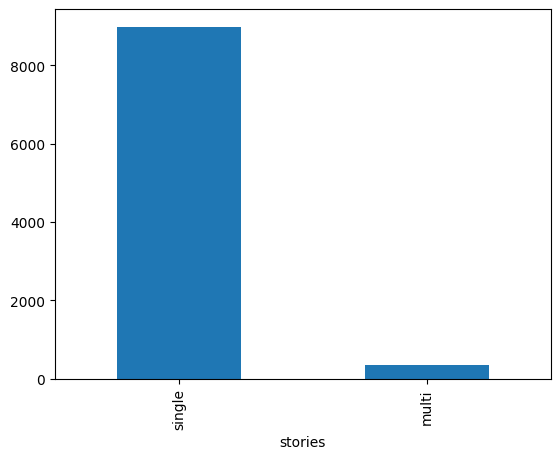

In [107]:
df['stories'].value_counts().plot(kind='bar')

In [108]:
df.drop('TOTAL_FLOOR',axis=1,inplace=True)

<Axes: xlabel='BALCONY_NUM'>

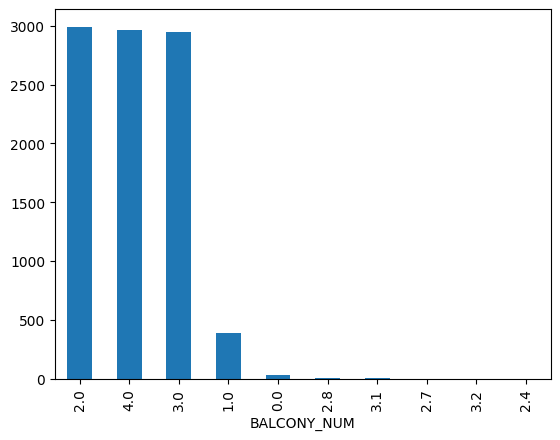

In [109]:
df['BALCONY_NUM'].value_counts().plot(kind='bar')

In [110]:
ind=df[(df['BALCONY_NUM']*10)%10 !=0].index
df.loc[ind,'BALCONY_NUM']=np.round(df.loc[ind,'BALCONY_NUM'])

In [111]:
df.to_csv('cleaned_data3.csv',index=False)